In [29]:
import pandas as pd

data = {
    'OrderID': [1001, 1002, 1003, 1004, 1005, 1006],
    'Customer': ['Alice', 'Bob', 'Alice', 'David', 'Bob', 'Eve'],
    'Region': ['East', 'West', 'East', 'North', 'West', 'East'],
    'Product': ['Phone', 'Tablet', 'Laptop', 'Phone', 'Tablet', 'Laptop'],
    'Quantity': [1, 2, 1, 3, 1, 2],
    'UnitPrice': [500, 800, 1200, 500, 800, 1200],
    'OrderDate': pd.to_datetime(['2024-01-01', '2024-01-03', '2024-01-04', '2024-01-06', '2024-01-07', '2024-01-10'])
}

df = pd.DataFrame(data)
df['Sales'] = df['Quantity'] * df['UnitPrice']  # total sale value
print(df)


   OrderID Customer Region Product  Quantity  UnitPrice  OrderDate  Sales
0     1001    Alice   East   Phone         1        500 2024-01-01    500
1     1002      Bob   West  Tablet         2        800 2024-01-03   1600
2     1003    Alice   East  Laptop         1       1200 2024-01-04   1200
3     1004    David  North   Phone         3        500 2024-01-06   1500
4     1005      Bob   West  Tablet         1        800 2024-01-07    800
5     1006      Eve   East  Laptop         2       1200 2024-01-10   2400


In [30]:
# Grouping
# 1️⃣ Group by Customer

print(df.groupby('Customer')['Sales'].sum())


Customer
Alice    1700
Bob      2400
David    1500
Eve      2400
Name: Sales, dtype: int64


In [31]:
# Group by Region with multiple aggregations

print(df.groupby('Region').agg({
    'Quantity': 'sum',
    'Sales': ['mean', 'sum']
}))

#  Shows total quantity, average sales, and total sales per region.

       Quantity        Sales      
            sum         mean   sum
Region                            
East          4  1366.666667  4100
North         3  1500.000000  1500
West          3  1200.000000  2400


In [4]:
pivot = df.pivot_table(values='Sales', index='Region', columns='Product', aggfunc='sum', fill_value=0)
print(pivot)


Product  Laptop  Phone  Tablet
Region                        
East       3600    500       0
North         0   1500       0
West          0      0    2400


In [5]:
# Pivoting means transforming a long (or tall) DataFrame into a wide one. You do this by turning unique values in a column into new columns, and aggregating values accordingly

In [6]:
import pandas as pd

# Sample data
df = pd.DataFrame({
    'date': ['2024-06-01', '2024-06-01', '2024-06-02', '2024-06-02'],
    'city': ['New York', 'Los Angeles', 'New York', 'Los Angeles'],
    'temperature': [70, 75, 68, 74]
})

print(df)


         date         city  temperature
0  2024-06-01     New York           70
1  2024-06-01  Los Angeles           75
2  2024-06-02     New York           68
3  2024-06-02  Los Angeles           74


In [7]:
#  Pivot it to have cities as columns:
pivot_df = df.pivot(index='date', columns='city', values='temperature')
print(pivot_df)
print("hello")
# print("pivot_df : " , pivot_df)

city        Los Angeles  New York
date                             
2024-06-01           75        70
2024-06-02           74        68
hello


In [8]:
import pandas as pd

df = pd.DataFrame({
    'Date': ['2024-06-01', '2024-06-01', '2024-06-02', '2024-06-02'],
    'City': ['New York', 'Los Angeles', 'New York', 'Los Angeles'],
    'Temperature': [70, 75, 68, 74]
})


In [9]:
pivot_df = df.pivot(index='Date', columns='City', values='Temperature')


In [10]:
rows = df['Date'].unique()
columns = df['City'].unique()

print(rows)
print(columns)


['2024-06-01' '2024-06-02']
['New York' 'Los Angeles']


In [11]:
# Create an empty DataFrame
result = pd.DataFrame(index=rows, columns=columns)
result


,New York,Los Angeles
2024-06-01,NaN,NaN
2024-06-02,NaN,NaN


In [12]:
for _, row in df.iterrows():
    date = row['Date']
    city = row['City']
    temp = row['Temperature']
    
    result.loc[date, city] = temp
print(result)


           New York Los Angeles
2024-06-01       70          75
2024-06-02       68          74


In [13]:
import pandas as pd

data = {
    'Date': ['2024-06-01', '2024-06-01', '2024-06-01', '2024-06-02', '2024-06-02'],
    'City': ['New York', 'New York', 'Los Angeles', 'New York', 'Los Angeles'],
    'Temperature': [70, 72, 75, 68, 74]
}

df = pd.DataFrame(data)
print(df)


         Date         City  Temperature
0  2024-06-01     New York           70
1  2024-06-01     New York           72
2  2024-06-01  Los Angeles           75
3  2024-06-02     New York           68
4  2024-06-02  Los Angeles           74


In [15]:
df.pivot_table(index='Date', columns='City', values='Temperature')


City,Los Angeles,New York
Date,,
2024-06-01,75.0,71.0
2024-06-02,74.0,68.0


In [ ]:
# pivot_df = df.pivot_table(index='Date', columns='City', values='Temperature', aggfunc='mean')
# print(pivot_df)


City        Los Angeles  New York
Date                             
2024-06-01         75.0      71.0
2024-06-02         74.0      68.0


In [18]:
pivot_df = df.pivot_table(index='Date', columns='City', values='Temperature', aggfunc='sum')
print(pivot_df)

City        Los Angeles  New York
Date                             
2024-06-01           75       142
2024-06-02           74        68


In [28]:
import pandas as pd

data = {
    'OrderDate': ['2023-01-10', '2023-01-20', '2023-02-15', '2023-02-28', '2023-03-01'],
    'Amount': [100, 150, 200, 50, 300]
}

df = pd.DataFrame(data)
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df

,OrderDate,Amount
0,2023-01-10,100
1,2023-01-20,150
2,2023-02-15,200
3,2023-02-28,50
4,2023-03-01,300


In [21]:
monthly_total = df.set_index('OrderDate').resample('M').sum()


/tmp/ipykernel_9604/3781636633.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_total = df.set_index('OrderDate').resample('M').sum()


In [22]:
monthly_total

,Amount
OrderDate,
2023-01-31,250
2023-02-28,250
2023-03-31,300


/tmp/ipykernel_9604/400443409.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.set_index('OrderDate').resample('M').sum()


Monthly Sales Totals:
             Amount
OrderDate         
2023-01-31     250
2023-02-28     250
2023-03-31     300


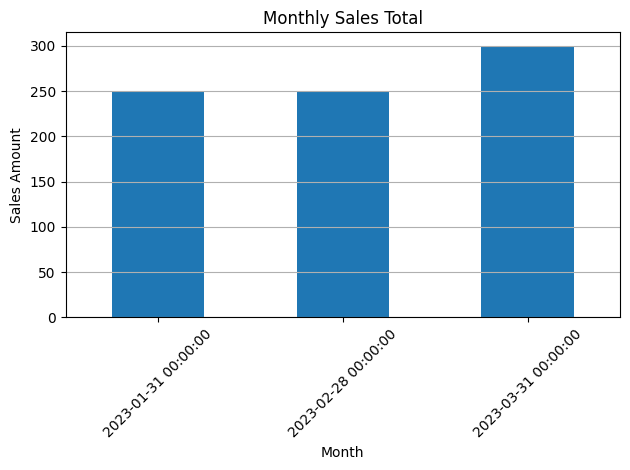

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {
    'OrderDate': ['2023-01-10', '2023-01-20', '2023-02-15', '2023-02-28', '2023-03-01'],
    'Amount': [100, 150, 200, 50, 300]
}

# Step 1: Create DataFrame
df = pd.DataFrame(data)

# Step 2: Convert OrderDate to datetime
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

# Step 3: Resample to Monthly Total
monthly_sales = df.set_index('OrderDate').resample('M').sum()

# Step 4: Display Result
print("Monthly Sales Totals:\n", monthly_sales)

# Step 5: Plot the result
monthly_sales.plot(kind='bar', legend=False)
plt.title("Monthly Sales Total")
plt.xlabel("Month")
plt.ylabel("Sales Amount")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [25]:
import pandas as pd

df = pd.DataFrame({
    'Name': ['Alice', 'Bob'],
    'Math': [90, 80],
    'Science': [85, 75]
})

print("Original DataFrame:")
print(df)

# Melt the DataFrame
melted = pd.melt(df, id_vars=['Name'], value_vars=['Math', 'Science'], 
                 var_name='Subject', value_name='Score')

print("\nMelted DataFrame:")
print(melted)


Original DataFrame:
    Name  Math  Science
0  Alice    90       85
1    Bob    80       75

Melted DataFrame:
    Name  Subject  Score
0  Alice     Math     90
1    Bob     Math     80
2  Alice  Science     85
3    Bob  Science     75


In [ ]:
# stack(): Wide ➡️ Long (multi-level index)
# 🔹 What it does:
# stack() compresses columns into the index — turning columns into rows.

In [26]:
df = pd.DataFrame({
    'Math': [90, 80],
    'Science': [85, 75]
}, index=['Alice', 'Bob'])

print("Original DataFrame:")
print(df)

stacked = df.stack()

print("\nStacked DataFrame:")
print(stacked)


Original DataFrame:
       Math  Science
Alice    90       85
Bob      80       75

Stacked DataFrame:
Alice  Math       90
       Science    85
Bob    Math       80
       Science    75
dtype: int64


In [27]:
#  Summary Table:
# Function	Converts	Description
# melt()	Wide ➡️ Long	Makes one column per variable name/value
# stack()	Wide ➡️ Long	Moves columns into rows (multi-index)
# unstack()	Long ➡️ Wide	Moves row index to columns




unstacked = stacked.unstack()
print("\nUnstacked DataFrame:")
print(unstacked)



Unstacked DataFrame:
       Math  Science
Alice    90       85
Bob      80       75


In [ ]:
# Key Internal Objects Used by Pandas:
# Index, MultiIndex: For handling levels of rows/columns.

# DataFrame.values, DataFrame.columns, DataFrame.index: To loop and map values.

# numpy.reshape() and broadcasting logic: Internally used to build efficient reshaped arrays.

